In [1]:
import numpy as np
import pandas as pd

In [2]:
m_h=np.random.randint(160,240,250)
f_h=np.random.randint(140,150,250)
height=np.concatenate((m_h,f_h))

In [3]:
m_w=np.random.randint(60,150,250)
f_w=np.random.randint(40,90,250)
weight=np.concatenate((m_w,f_w))

In [5]:
m_g=np.full(250,'Male')
f_g=np.full(250,'Female')
gender=np.concatenate((m_g,f_g))

In [6]:
df=pd.DataFrame(height,columns=['Height'])

In [7]:
df['weight']=weight

In [8]:
df['Gender']=gender

In [9]:
df

,Height,weight,Gender
0,238,146,Male
1,202,123,Male
2,239,116,Male
3,237,121,Male
4,201,82,Male
...,...,...,...
495,149,89,Female
496,143,82,Female
497,147,47,Female
498,142,57,Female


In [10]:
x=df.iloc[:,:2]
y=df.iloc[:,2]

In [11]:
x

,Height,weight
0,238,146
1,202,123
2,239,116
3,237,121
4,201,82
...,...,...
495,149,89
496,143,82
497,147,47
498,142,57


In [12]:
y

0        Male
1        Male
2        Male
3        Male
4        Male
        ...  
495    Female
496    Female
497    Female
498    Female
499    Female
Name: Gender, Length: 500, dtype: object

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=52)

In [15]:
x_train.head()

,Height,weight
159,160,125
198,193,134
259,148,56
301,142,67
220,204,76


In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
model=KNeighborsClassifier(n_neighbors=3)

In [18]:
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [19]:
pred=model.predict(x_train)

In [20]:
from sklearn.metrics import confusion_matrix,classification_report

In [21]:
print(classification_report(y_train,pred))

              precision    recall  f1-score   support

      Female       1.00      1.00      1.00       200
        Male       1.00      1.00      1.00       200

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



In [22]:
test_pred=model.predict(x)

In [23]:
print(classification_report(y,test_pred))

              precision    recall  f1-score   support

      Female       1.00      1.00      1.00       250
        Male       1.00      1.00      1.00       250

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



In [24]:
model.predict([[197,76]])

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Male'], dtype=object)

In [25]:
error_rate=[]
for i in range(1,41):
    m=KNeighborsClassifier(n_neighbors=i)
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    error_rate.append(np.mean(y_test!=pred))

In [26]:
error_rate

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [27]:
import matplotlib.pyplot as plt

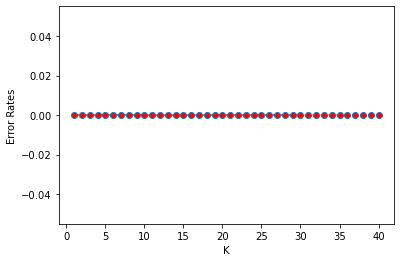

In [28]:
plt.plot(range(1,41),error_rate,marker='o',ls='--',mfc='red')
plt.xlabel('K')
plt.ylabel('Error Rates');

In [29]:
name=input('Enter Your Name: ')
H=int(input('Enter Yoour Height: '))
w=int(input('Enter Your Weight: '))
pred=model.predict([[H,w]])
if pred[0]=='Male':
    print(f'Gender of {name} is male.')
else:
    print(f'Gender of {name} is Female.')
    
                                                             

                                                            